In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
import os
import random
%matplotlib inline

In [10]:
image_height=48
image_width=48
batch_size=32

train_data_directory='train/'
test_data_directory='test/'

train_datagen=ImageDataGenerator(rescale=(1.0/255),rotation_range=45,width_shift_range=2,horizontal_flip=True,height_shift_range=2,zoom_range=0.2,brightness_range=(0.5,2),fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=(1.0/255),brightness_range=(0.5,2),width_shift_range=2,horizontal_flip=True,height_shift_range=2,fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(train_data_directory,color_mode='grayscale',target_size=(image_height,image_width),
    batch_size=batch_size,shuffle=True,class_mode='categorical')

test_generator=validation_datagen.flow_from_directory(test_data_directory,color_mode='grayscale',target_size=(image_height,image_width),
    batch_size=batch_size,shuffle=True,class_mode='categorical')
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

img,label=train_generator.__next__()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Text(0.5, 1.0, 'Neutral')

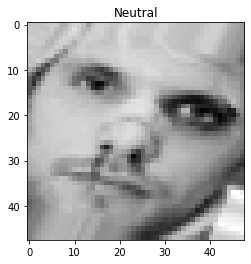

In [11]:
i=random.randint(0,(img.shape[0])-1)
image=img[i]
labl=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0],cmap='gray')
plt.title(labl)

# Making the model

In [12]:
model=Sequential()

model.add(Convolution2D(32,kernel_size=(2,2),activation='relu',input_shape=(48,48,1)))
model.add(Convolution2D(64,kernel_size=(2,2),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.10))
          
model.add(Convolution2D(96,kernel_size=(3,3),activation='relu'))
model.add(Convolution2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.12))

model.add(Convolution2D(256,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))
          
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())
          
train_images=0
test_images=0



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 96)        55392     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 128)       110720    
                                                        

2022-09-20 11:58:47.465449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 11:58:47.465475: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 11:58:47.465490: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (parrot): /proc/driver/nvidia/version does not exist
2022-09-20 11:58:47.465659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/60
897/897 [==============================] - 257s 285ms/step - loss: 1.7913 - accuracy: 0.2605 - val_loss: 1.7137 - val_accuracy: 0.2977
Epoch 2/60
897/897 [==============================] - 295s 328ms/step - loss: 1.7082 - accuracy: 0.3075 - val_loss: 1.6002 - val_accuracy: 0.3690
Epoch 3/60
897/897 [==============================] - 547s 610ms/step - loss: 1.6135 - accuracy: 0.3641 - val_loss: 1.4831 - val_accuracy: 0.4208
Epoch 4/60
897/897 [==============================] - 539s 601ms/step - loss: 1.5326 - accuracy: 0.4060 - val_loss: 1.3950 - val_accuracy: 0.4597
Epoch 5/60
897/897 [==============================] - 513s 572ms/step - loss: 1.4759 - accuracy: 0.4272 - val_loss: 1.3380 - val_accuracy: 0.4817
Epoch 6/60
897/897 [==============================] - 545s 607ms/step - loss: 1.4229 - accuracy: 0.4519 - val_loss: 1.3138 - val_accuracy: 0.4916
Epoch 7/60
897/897 [==============================] - 262s 292ms/step - loss: 1.3937 - accuracy: 0.4651 - val_loss: 1.2737 -

Epoch 57/60
897/897 [==============================] - 176s 197ms/step - loss: 1.1077 - accuracy: 0.5797 - val_loss: 1.0768 - val_accuracy: 0.5943
Epoch 58/60
897/897 [==============================] - 181s 202ms/step - loss: 1.1006 - accuracy: 0.5795 - val_loss: 1.0912 - val_accuracy: 0.5865
Epoch 59/60
897/897 [==============================] - 176s 196ms/step - loss: 1.1071 - accuracy: 0.5773 - val_loss: 1.0651 - val_accuracy: 0.5986
Epoch 60/60
897/897 [==============================] - 185s 206ms/step - loss: 1.1015 - accuracy: 0.5831 - val_loss: 1.1095 - val_accuracy: 0.5829


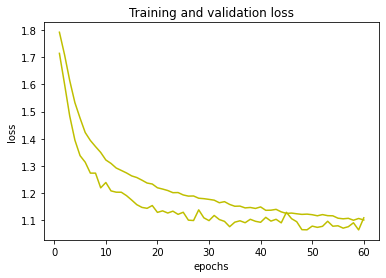

In [5]:
for root,dirs,files in os.walk(train_data_directory):
          train_images+=len(files)
          
for root,dirs,files in os.walk(test_data_directory):
          test_images+=len(files)
          
history=model.fit(train_generator,steps_per_epoch=train_images//batch_size,epochs=60,validation_data=test_generator,validation_steps=test_images//batch_size)
model.save("Emotion_detection.h5")
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'y',label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 71ms/step
Accuracy= 0.5625


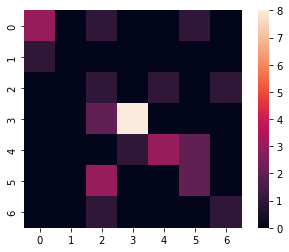

In [10]:
from keras.models import load_model
from sklearn import metrics
import seaborn as sns

my_model=load_model('Emotion_detection.h5',compile=False)
test_img,test_lbl=test_generator.__next__()
predictions=my_model.predict(test_img)
predictions=np.argmax(predictions,axis=1)
test_labels=np.argmax(test_lbl,axis=1)
print("Accuracy=",metrics.accuracy_score(test_labels,predictions))
cm=metrics.confusion_matrix(test_labels,predictions)
sns.heatmap(cm)

class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
n=random.randint(0,test_img.shape[0]-1)
image=test_img[n]
orig_lab1=class_labels[test_labels[n]]
pred_lab1=class_labels[predictions[n]]
plt.imshow(image[:,:,0],cmap='gray')
#plt.title("Original label is:",orig_lab1['pred_lab1'])
plt.show()